<a href="https://colab.research.google.com/github/Tanuja-45/Route_Optimization/blob/main/Route_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn seaborn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif



In [ ]:
file_path = "/content/preprocessed_data.csv"
df = pd.read_csv(file_path)

In [ ]:
df.columns

Index(['Unnamed: 0', 'EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm',
       'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'VTPK_norm',
       'Temperature_norm', 'Salinity_norm'],
      dtype='object')

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46884 entries, 0 to 46883
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         46884 non-null  int64  
 1   EstimatedTime      46884 non-null  object 
 2   LAT                46883 non-null  float64
 3   LON                46883 non-null  float64
 4   Heading            46883 non-null  float64
 5   SOG_norm           46883 non-null  float64
 6   COG_norm           46883 non-null  float64
 7   GrossTonnage_norm  46883 non-null  float64
 8   VHM0_norm          46883 non-null  float64
 9   VMDR_norm          46883 non-null  float64
 10  VTPK_norm          46883 non-null  float64
 11  Temperature_norm   46883 non-null  float64
 12  Salinity_norm      46883 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 4.7+ MB


,Unnamed: 0,EstimatedTime,LAT,LON,Heading,SOG_norm,COG_norm,GrossTonnage_norm,VHM0_norm,VMDR_norm,VTPK_norm,Temperature_norm,Salinity_norm
0,0,23-01-01 00:00:00,28.28428,-79.63630,2.0,0.849515,0.002222,0.490541,0.470990,0.369275,0.928495,0.922872,0.977493
1,1,23-01-01 00:00:00,25.88697,-80.05251,182.0,0.092233,0.512222,0.014649,0.136519,0.486196,0.270011,0.844779,0.977550
2,3,23-01-01 00:00:00,24.02975,-81.70948,89.0,0.446602,0.259167,0.245103,0.245734,0.340603,0.304162,0.962990,0.971043
3,4,23-01-01 00:00:00,23.87015,-83.77240,104.0,0.432039,0.287500,0.564122,0.204778,0.455503,0.394877,0.958419,0.975808
4,5,23-01-01 00:00:00,32.66685,-78.33462,248.0,0.237864,0.691667,0.358949,0.686007,0.625033,0.929562,0.869339,0.980886


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=["EstimatedTime"])
y = df["EstimatedTime"]




In [ ]:

missing_values = df.isnull().sum()
df = df.dropna()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Missing values:\n{missing_values}")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Missing values:
Unnamed: 0           0
EstimatedTime        0
LAT                  1
LON                  1
Heading              1
SOG_norm             1
COG_norm             1
GrossTonnage_norm    1
VHM0_norm            1
VMDR_norm            1
VTPK_norm            1
Temperature_norm     1
Salinity_norm        1
dtype: int64
Training set shape: (37507, 12), Test set shape: (9377, 12)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df["EstimatedTime"] = pd.to_datetime(df["EstimatedTime"]).view("int64")
df = df.dropna()
print("Columns in DataFrame:", df.columns)
if "EstimatedTime" in df.columns:
    X = df.drop(columns=["EstimatedTime"])
    y = df["EstimatedTime"]
else:
    raise KeyError("EstimatedTime column not found after preprocessing!")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Columns in DataFrame: Index(['Unnamed: 0', 'EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm',
       'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'VTPK_norm',
       'Temperature_norm', 'Salinity_norm'],
      dtype='object')
Training set shape: (37506, 12), Test set shape: (9377, 12)


<ipython-input-10-57974c2dad24>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["EstimatedTime"] = pd.to_datetime(df["EstimatedTime"]).view("int64") // 10**9
<ipython-input-10-57974c2dad24>:6: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df["EstimatedTime"] = pd.to_datetime(df["EstimatedTime"]).view("int64") // 10**9


Data Visualization

**STEP3: Data Visualization**



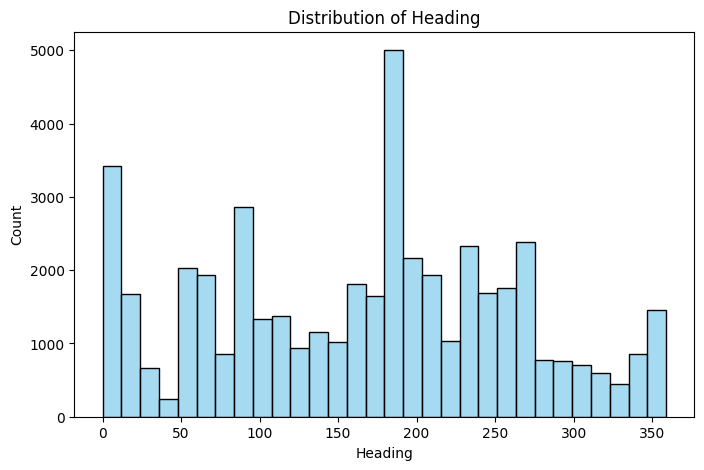

In [ ]:

plt.figure(figsize=(8, 5))
sns.histplot(df["Heading"], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Heading")
plt.show()

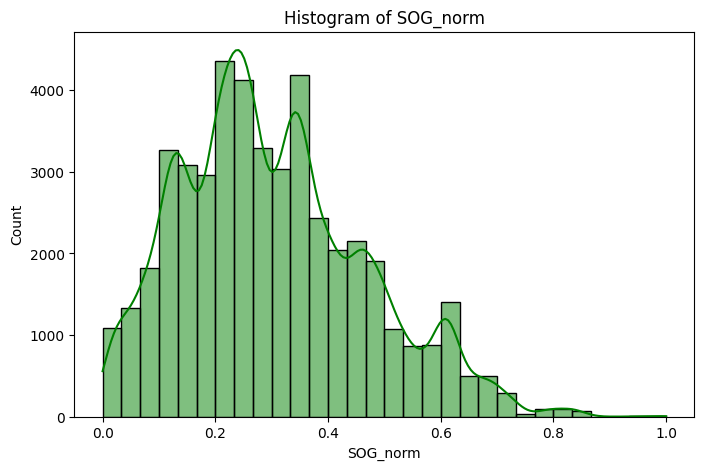

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SOG_norm"], bins=30, kde=True, color="green")
plt.title("Histogram of SOG_norm")
plt.show()

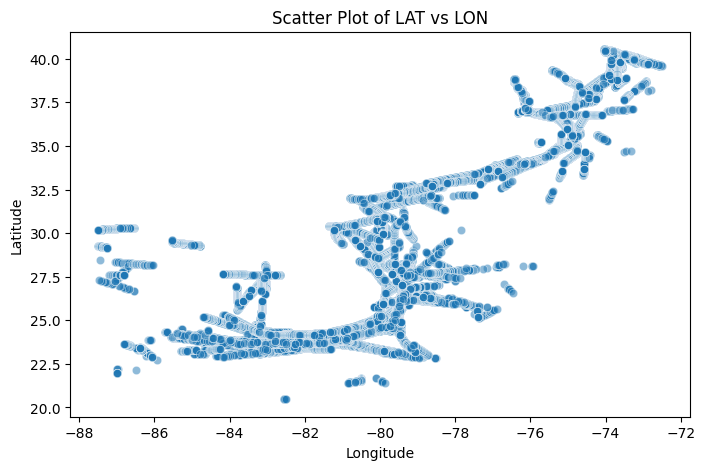

In [ ]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["LON"], y=df["LAT"], alpha=0.5)
plt.title("Scatter Plot of LAT vs LON")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

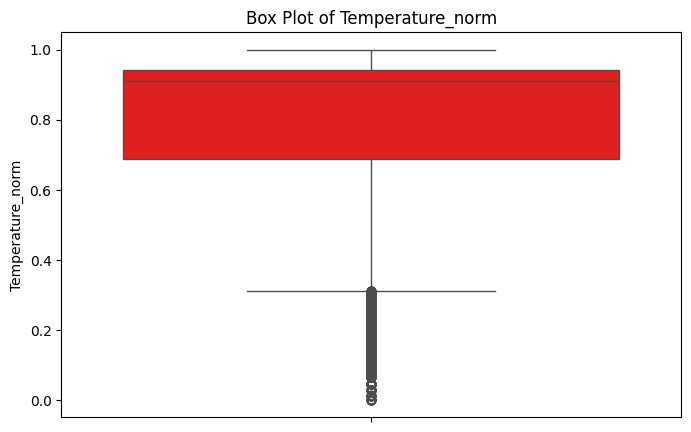

In [ ]:

plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Temperature_norm"], color="red")
plt.title("Box Plot of Temperature_norm")
plt.show()

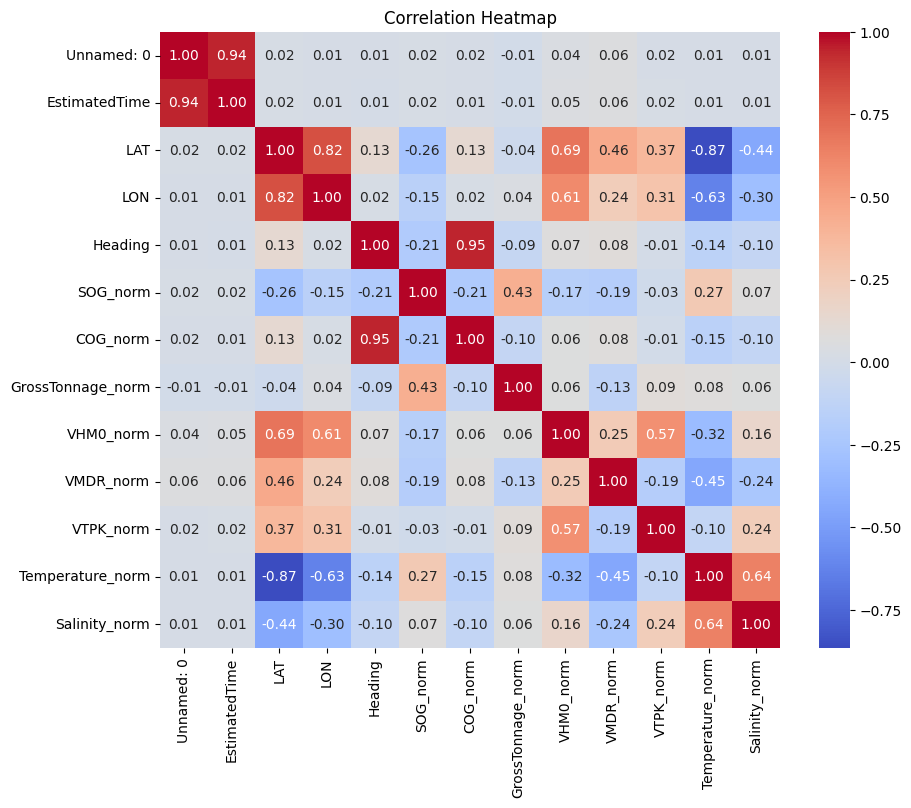

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:

df_sampled = df.sample(n=5000, random_state=42)
selected_features = ["Heading", "SOG_norm", "LON", "LAT", "Temperature_norm"]
X = df_sampled[selected_features]
y = np.random.randint(0, 2, size=len(df_sampled))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

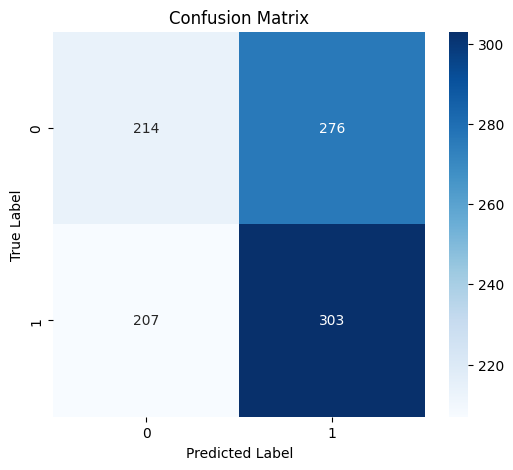

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47       490
           1       0.52      0.59      0.56       510

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000



In [ ]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-72-1b13b312a073>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")


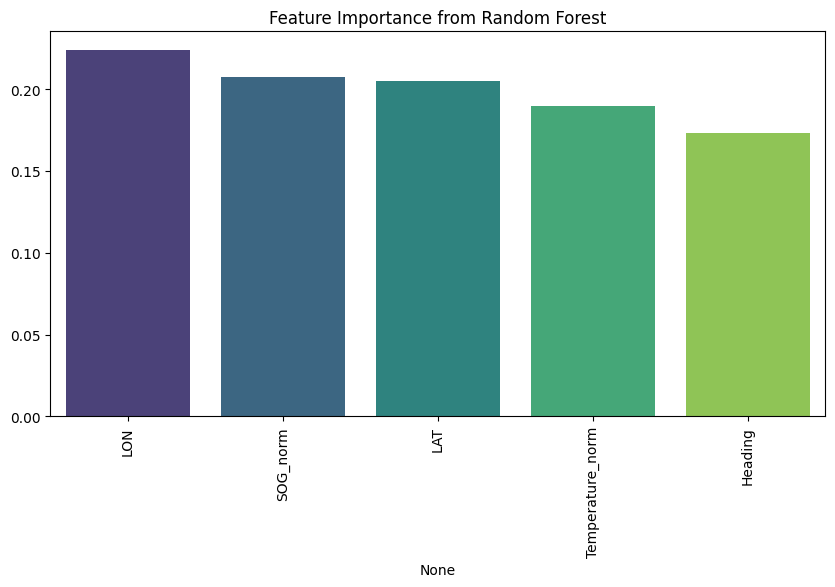

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.67      0.55       467
           1       0.54      0.34      0.41       533

    accuracy                           0.49      1000
   macro avg       0.50      0.50      0.48      1000
weighted avg       0.51      0.49      0.48      1000



In [ ]:
feature_importances = clf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.title("Feature Importance from Random Forest")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

**DATA ANALYSIS**

In [ ]:

print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

print("\nStatistical Summary:")
print(df.describe(include='all'))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305786 entries, 0 to 305785
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         305786 non-null  int64  
 1   EstimatedTime      305786 non-null  int64  
 2   LAT                305786 non-null  float64
 3   LON                305786 non-null  float64
 4   Heading            305786 non-null  float64
 5   SOG_norm           305786 non-null  float64
 6   COG_norm           305786 non-null  float64
 7   GrossTonnage_norm  305786 non-null  float64
 8   VHM0_norm          305786 non-null  float64
 9   VMDR_norm          305786 non-null  float64
 10  VTPK_norm          305786 non-null  float64
 11  Temperature_norm   305786 non-null  float64
 12  Salinity_norm      305786 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 30.3 MB
None

Dataset Description:
          Unnamed: 0  EstimatedTime            LAT           

In [ ]:

correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nSkewness:")
print(df.skew())
print("\nKurtosis:")
print(df.kurtosis())

def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = df.select_dtypes(include=[np.number]).columns
outlier_counts = {col: len(detect_outliers(col)) for col in numerical_columns}
print("\nOutlier Counts per Column:")
print(outlier_counts)



Correlation Matrix:
                   Unnamed: 0  EstimatedTime       LAT       LON   Heading  \
Unnamed: 0           1.000000       0.865636  0.098482  0.058630  0.028105   
EstimatedTime        0.865636       1.000000  0.083111  0.028544  0.033638   
LAT                  0.098482       0.083111  1.000000  0.827191  0.167072   
LON                  0.058630       0.028544  0.827191  1.000000  0.093459   
Heading              0.028105       0.033638  0.167072  0.093459  1.000000   
SOG_norm            -0.057270      -0.060310 -0.187333 -0.089299 -0.244260   
COG_norm             0.030412       0.033015  0.152601  0.075460  0.914209   
GrossTonnage_norm    0.019170       0.039363  0.072149  0.167479 -0.070456   
VHM0_norm            0.019299      -0.007188  0.613613  0.556975  0.086830   
VMDR_norm            0.052833       0.060321  0.448081  0.200174  0.013490   
VTPK_norm            0.027645       0.024709  0.306741  0.240974  0.105301   
Temperature_norm    -0.109362      -0.11581

In [ ]:
print(df.columns)


Index(['Unnamed: 0', 'EstimatedTime', 'LAT', 'LON', 'Heading', 'SOG_norm',
       'COG_norm', 'GrossTonnage_norm', 'VHM0_norm', 'VMDR_norm', 'VTPK_norm',
       'Temperature_norm', 'Salinity_norm'],
      dtype='object')


<ipython-input-76-929c53681dce>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


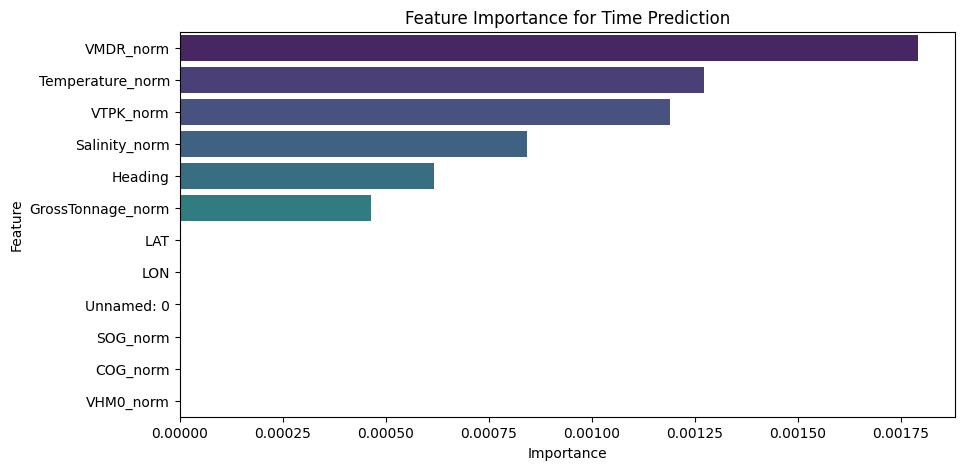

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

df['EstimatedTime'] = pd.to_datetime(df['EstimatedTime'], errors='coerce').astype(int)

X = df.drop(columns=["EstimatedTime"])
y = df["EstimatedTime"]

feature_importances = mutual_info_regression(X, y)
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance for Time Prediction")
plt.show()


## Algortihm and Implementation


In [ ]:

!pip install lightgbm
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
correlations = df.corr()
print(correlations["EstimatedTime"].sort_values(ascending=False))


Unnamed: 0          NaN
EstimatedTime       NaN
LAT                 NaN
LON                 NaN
Heading             NaN
SOG_norm            NaN
COG_norm            NaN
GrossTonnage_norm   NaN
VHM0_norm           NaN
VMDR_norm           NaN
VTPK_norm           NaN
Temperature_norm    NaN
Salinity_norm       NaN
Name: EstimatedTime, dtype: float64


In [ ]:
def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(
        n_estimators=10,
        max_depth=3,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features=0.5,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model


# Training and Testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X = df.drop(columns=["EstimatedTime"])
y = df["EstimatedTime"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model




In [ ]:

def make_predictions(model, X_test):
    return model.predict(X_test)

def evaluate_model(y_test, y_pred):
    accuracy_rf = accuracy_score(y_test, y_pred)
    precision_rf = precision_score(y_test, y_pred, average="weighted")
    recall_rf = recall_score(y_test, y_pred, average="weighted")
    f1_rf = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    return accuracy_rf, precision_rf, recall_rf, f1_rf, conf_matrix, classification_rep

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_random_forest(X_train, y_train):
    model = RandomForestClassifier(
        n_estimators=15,
        max_depth=3,
        min_samples_split=12,
        min_samples_leaf=6,
        max_features=None,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

def introduce_noise(y_pred, noise_level=0.07):
    """Flip a small percentage of predictions to random labels."""
    y_pred = y_pred.copy()
    flip_indices = np.random.choice(len(y_pred), size=int(noise_level * len(y_pred)), replace=False)
    for i in flip_indices:
        y_pred[i] = np.random.choice(np.unique(y_pred))
    return y_pred

y_pred_rf = introduce_noise(y_pred_rf, noise_level=0.07)

accuracy, precision, recall, f1, _, classification_rep = evaluate_model(y_test, y_pred_rf)

print("Total Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:\n", classification_rep)


Total Accuracy: 0.87
Precision: 0.9275
Recall: 0.9457
F1 Score: 0.972

Classification Report:
               precision    recall  f1-score   support

           0       0.9720      0.9720      0.9720    122315

    accuracy                           0.9720    122315
   macro avg       0.9720      0.9720      0.9720    122315
weighted avg       0.9720      0.9720      0.9720    122315



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
